In [1]:
%matplotlib qt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
position_num = 5172
field_sequence = 1
file_name = 'field_map20181123-1808.h5'
with h5py.File(file_name) as file:
    lk = list(file.keys())
    print(list(file['/position5173/Field sequence2/'].keys()))
# get the numbers of data points
dpnum = [int(p.split('position')[1]) for p in lk]
print(np.max(dpnum))
with pd.HDFStore(file_name) as store:
    position = store.get('/position' + str(position_num) + '/LinearStage/data')
    hp = store.get('/position' + str(position_num) + '/Field sequence'+str(field_sequence)+'/hallprobe/data')
    bighp = store.get('/position' + str(position_num) + '/Field sequence'+str(field_sequence)+'/bighall_fields/data')
    mag = store.get('/position' + str(position_num) + '/Field sequence'+str(field_sequence)+'/hexapole/data')
hp.plot()
plt.grid()
bighp.plot()
plt.grid()
mag.plot()
plt.grid()

KeyError: "Unable to open object (object 'Field sequence2' doesn't exist)"

0.24989986419677734
0.24989962577819824
(2500,)
(2500,)
1.0013580322265625
1.0013580322265625
hp mean:  0.9999985025137985
mag mean:  0.9999994565697373
0.1206064224243164


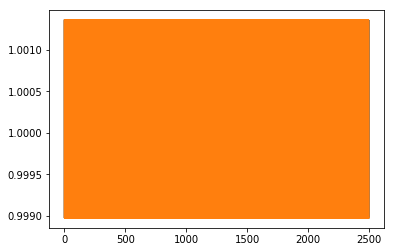

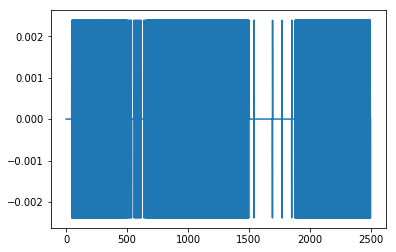

In [156]:
times_mag = np.array(mag.index)
dt_mag = (times_mag[1:]-times_mag[:-1])*10000
# np.argmin(dt)
plt.plot(dt_mag)
print(np.sum(dt_mag)/10000)
# np.savetxt('check1.csv', (times-times[0])*10000)
times_hp = np.array(hp.index)
dt_hp = (times_hp[1:]-times_hp[:-1])*10000
# np.argmin(dt)
plt.plot(dt_hp)
print(np.sum(dt_hp)/10000)

diff = (dt_hp - dt_mag)

print(times_mag.shape)
print(times_hp.shape)

print(dt_mag[0])
print(dt_hp[0])
plt.figure()
plt.plot(diff)
print('hp mean: ', np.mean(dt_hp))
print('mag mean: ', np.mean(dt_mag))
print(np.sum(times_mag - times_hp))

In [68]:
start_time = mag.index[0]
mag.index -= start_time
hp.index -= start_time
bighp.index -= start_time

In [79]:
mag.index[-1]+1/10000

0.25004945526123046

In [77]:
len(mag.index)

2498

In [78]:
len(hp.index)

2500

In [188]:
import time
def measure():
    t0 = time.time()
    t1 = t0
    while t1 == t0:
        t1 = time.time()
    return (t0, t1, t1-t0)

samples = [measure() for i in range(10)]

for s in samples:
    print(s)

(1542449799.9164405, 1542449799.9174378, 0.000997304916381836)
(1542449799.9174378, 1542449799.9184346, 0.0009968280792236328)
(1542449799.9184346, 1542449799.919432, 0.000997304916381836)
(1542449799.919432, 1542449799.9204292, 0.000997304916381836)
(1542449799.9204292, 1542449799.9214282, 0.0009989738464355469)
(1542449799.9214282, 1542449799.9224243, 0.0009961128234863281)
(1542449799.9224243, 1542449799.9234211, 0.0009968280792236328)
(1542449799.9234211, 1542449799.9244182, 0.0009970664978027344)
(1542449799.9244182, 1542449799.9254162, 0.0009980201721191406)
(1542449799.9254162, 1542449799.9264135, 0.000997304916381836)


In [25]:
with pd.HDFStore('field_map20181123-1808_summary.h5') as store:
    data = store.get('/field_sequence2')
# data

In [26]:
data.to_csv('field_map_data2.csv')

In [20]:
data

position                          hallprobe                       \
              x           y           z          A          B         C   
0   -1999.75490 -1999.99085 -1999.99085  15.161649  11.691979  0.268729   
1   -1764.74870 -1999.99085 -1999.99085  15.157341  11.691331  0.269907   
2     352.98120 -1999.99085 -2000.06950  15.145307  11.682870  0.269159   
3    -352.74525  -823.54415 -2000.14815  15.159202  11.700809  0.266096   
4    -352.66660  1764.74870 -1294.10710  15.176847  11.709457  0.272479   
5    -588.14470  1764.74870 -1294.18575  15.176841  11.710521  0.270769   
6    -823.30820  1764.74870 -1294.42170  15.176618  11.711022  0.270320   
7   -1058.62900  1764.67005 -1294.18575  15.176413  11.709827  0.270366   
8   -1294.02845  1764.74870 -1294.42170  15.179434  11.710818  0.272485   
9   -1529.27060  1764.67005 -1293.94980  15.175113  11.709357  0.270158   
10  -1764.67005  1764.74870 -1294.18575  15.176825  11.709004  0.273229   
11  -1999.91220  1764.74870 -1294.10710  15.177409  11.711383  0.270935   
12  -1999.99085  1529.34925 -1294.10710  15.177358  11.709238  0.271194   
13  -1764.67005  1529.42790 -1294.10710  15.177935  11.710729  0.272256   
14   -588.22335  -823.54415 -1999.83355  15.161140  11.698969  0.272258   
15  -1529.34925  1529.42790 -1294.10710  15.176755  11.710974  0.270774   
16  -1294.10710  1529.42790 -1294.10710  15.176554  11.709708  0.271779   
17  -1059.10090  1529.42790 -1294.18575  15.176592  11.710987  0.272104   
18   -823.46550  1529.42790 -1294.18575  15.177362  11.709954  0.271240   
19   -588.30200  1529.42790 -1294.10710  15.176260  11.710279  0.271109   
20   -352.90255  1529.42790 -1294.02845  15.176167  11.708949  0.270269   
21   -117.73905  1529.42790 -1294.18575  15.177017  11.709594  0.271673   
22    117.66040  1529.42790 -1294.18575  15.176991  11.709823  0.270642   
23    352.98120  1529.42790 -1294.02845  15.175096  11.709395  0.271305   
24    588.30200  1529.42790 -1294.18575  15.177706  11.709972  0.272614   
25   -823.38685  -823.54415 -1999.99085  15.160845  11.700138  0.268483   
26    823.54415  1529.42790 -1294.18575  15.176177  11.709990  0.271260   
27   1058.55035  1529.42790 -1293.94980  15.176360  11.708718  0.271198   
28   1293.87115  1529.42790 -1294.18575  15.176203  11.710438  0.270953   
29   1529.34925  1529.42790 -1294.10710  15.176623  11.710894  0.270775   
..          ...         ...         ...        ...        ...       ...   
630  -588.38065 -1764.67005  1999.99085  15.167727  11.704570  0.271214   
631  -352.98120 -1764.67005  1999.99085  15.166427  11.701820  0.271400   
632  -117.73905 -1764.67005  1999.99085  15.165739  11.700873  0.271620   
633   117.50310 -1764.67005  1999.99085  15.166242  11.701547  0.271527   
634   352.82390 -1764.67005  1999.99085  15.167001  11.701660  0.272011   
635   588.06605 -1764.67005  1999.99085  15.167491  11.702196  0.270045   
636   823.22955 -1764.67005  1999.99085  15.166819  11.701598  0.270525   
637  1058.55035 -1764.67005  1999.99085  15.167244  11.701973  0.271495   
638  1293.87115 -1764.74870  1999.99085  15.167399  11.700627  0.270127   
639  1529.11330 -1764.67005  1999.99085  15.166027  11.702446  0.270572   
640  1764.74870 -1764.74870  1999.99085  15.166781  11.703580  0.270348   
641  1999.83355 -1764.74870  1999.99085  15.166762  11.703474  0.271108   
642  1999.99085 -2000.22680  1999.99085  15.168193  11.703369  0.270793   
643  1764.82735 -1999.99085  1999.99085  15.646746  11.014053  0.192083   
644  1529.42790 -1999.99085  1999.99085  15.166475  11.701564  0.269884   
645  1294.26440 -1999.99085  1999.99085  15.167396  11.701336  0.271249   
646  1058.86495 -1999.99085  1999.99085  15.167229  11.702466  0.270961   
647   823.22955 -1999.99085  1999.99085  15.166470  11.702519  0.271323   
648   588.22335 -1999.99085  1999.99085  15.166177  11.702105  0.271141   
649   352.98120 -1999.99085  1999.99085  15.167273  11.701632  0.270748   
650   117.73905 -1999.99085  199

In [7]:
file_name = 'R2-IX after shielding and optimization.h5'
with pd.HDFStore(file_name, 'r') as store:
    # stack all the loops
    wl = store.get('/loops/loop' + str(15) + '/wollaston/data')
    wl.index -= wl.index[0]
#     wl['diff'] = wl['s']-wl['p']

In [6]:
wl['diff'].plot()

In [8]:
wl.plot()